Instagram Likes Report
Carson Bauer
9/12/2024

I am the source of my own personal Instagram data. The data was downloaded from my account, created by my Instagram activity.
This data was created to collect an idea of what I'm interested to reccommend new content to me, but primarily to build a profile to sell to advertisers.
This data is reliable because it is a direct record of what was liked and when. But it can be unreliable when trying to build patterns using more assumptions than data. The data itself (in the first file) is pretty limited with just a title and a time of like, which doesn't give much to go on without additional info.

In [1]:
import json as js
import pandas as pd

In [2]:
path = r"C:\Users\gamec\Desktop\School\Data in Emat\Likes Report\liked_posts.json"
with open(path) as j:
    likes = js.load(j)

In [3]:
likes.keys()

dict_keys(['likes_media_likes'])

In [4]:
likes_df = pd.DataFrame(likes['likes_media_likes'])

In [5]:
likes_df.keys()

Index(['title', 'string_list_data'], dtype='object')

In [6]:
likes_df.head()

,title,string_list_data
0,giuseppes.crabapples,[{'href': 'https://www.instagram.com/p/C_I5lzP...
1,reductress,[{'href': 'https://www.instagram.com/p/C_Iyp3P...
2,still_on_a_downward_spiral,[{'href': 'https://www.instagram.com/p/C_LTaP0...
3,spcaofwakecounty,[{'href': 'https://www.instagram.com/p/C-_fBRv...
4,happycloudsandtrees,[{'href': 'https://www.instagram.com/p/C-_I8yZ...


In [7]:
likes_df['string_list_data'].iloc[0]

[{'href': 'https://www.instagram.com/p/C_I5lzPJ6od/',
  'value': 'ð\x9f\x91\x8d',
  'timestamp': 1724769574}]

In [8]:
[x[0]['timestamp'] if isinstance(x, list) else ''\
 for x in likes_df['string_list_data']]

[1724769574,
 1724769560,
 1724769544,
 1724762230,
 1724720188,
 1724720170,
 1724715637,
 1724702277,
 1724700822,
 1724699157,
 1724689460,
 1724689309,
 1724670610,
 1724670407,
 1724637891,
 1724633552,
 1724633497,
 1724632549,
 1724627234,
 1724621763,
 1724614082,
 1724614070,
 1724612833,
 1724612566,
 1724612552,
 1724612352,
 1724612191,
 1724605770,
 1724605755,
 1724599768,
 1724599582,
 1724599461,
 1724551899,
 1724551889,
 1724550843,
 1724541696,
 1724541582,
 1724541326,
 1724537173,
 1724535248,
 1724535123,
 1724535068,
 1724533983,
 1724533518,
 1724530641,
 1724530574,
 1724530417,
 1724530386,
 1724525826,
 1724525816,
 1724513616,
 1724507251,
 1724465213,
 1724464974,
 1724459640,
 1724450500,
 1724450441,
 1724443001,
 1724440404,
 1724428683,
 1724426804,
 1724424083,
 1724423991,
 1724423977,
 1724423803,
 1724418763,
 1724414296,
 1724414205,
 1724414199,
 1724414144,
 1724414062,
 1724414017,
 1724414012,
 1724413987,
 1724385209,
 1724385201,
 1724385192,

This is the point where I got stuck before class. Looking back, I had all the pieces (locate the 0th element, and the x for x iteration, and I tried the reassignment, but I kept getting errors. From here forwards was completed in class.

In [9]:
type(likes_df['string_list_data'].iloc[0])

list

I thought about doing this, but wasn't sure what the point was be, I still don't understand the dictionary/definition/list definition fully

In [10]:
len(likes_df['string_list_data'].iloc[0])

1

In [11]:
likes_df['string_list_data'].iloc[0][0]

{'href': 'https://www.instagram.com/p/C_I5lzPJ6od/',
 'value': 'ð\x9f\x91\x8d',
 'timestamp': 1724769574}

In [12]:
likes_df['string_list_data'].iloc[0][0]['timestamp']

1724769574

It was here that I understood immediately what to do

In [13]:
likes_df.head()

,title,string_list_data
0,giuseppes.crabapples,[{'href': 'https://www.instagram.com/p/C_I5lzP...
1,reductress,[{'href': 'https://www.instagram.com/p/C_Iyp3P...
2,still_on_a_downward_spiral,[{'href': 'https://www.instagram.com/p/C_LTaP0...
3,spcaofwakecounty,[{'href': 'https://www.instagram.com/p/C-_fBRv...
4,happycloudsandtrees,[{'href': 'https://www.instagram.com/p/C-_I8yZ...


In [14]:
new_likes_df = pd.DataFrame([x[0] for x in likes_df['string_list_data']])
new_likes_df['title'] = likes_df['title']
new_likes_df.head()

,href,value,timestamp,title
0,https://www.instagram.com/p/C_I5lzPJ6od/,ð,1724769574,giuseppes.crabapples
1,https://www.instagram.com/p/C_Iyp3PNqSN/,ð,1724769560,reductress
2,https://www.instagram.com/p/C_LTaP0N6EO/,ð,1724769544,still_on_a_downward_spiral
3,https://www.instagram.com/p/C-_fBRvMHp7/,ð,1724762230,spcaofwakecounty
4,https://www.instagram.com/p/C-_I8yZpzUX/,ð,1724720188,happycloudsandtrees


My initial tactic was to just add "time liked" tile to a new column in the current dataframe (and that worked fine), but I opted for the method in class because I wanted to a) see how it works b) potentially mess with href (didn't happen)

In [15]:
new_likes_df.groupby('title').count().sort_values('timestamp', ascending = False).head()

,href,value,timestamp
title,,,
still_on_a_downward_spiral,543,543,543
punkrevolutionnow,119,119,119
annalaura_art,68,68,68
mummy__joe,58,58,58
muppethistory,57,57,57


The value of 543 was insane to me. I think this data is accumulated since I started the account in early middle school, and my friends don't post that often, but that is such a significantly higher number than the other.

<Axes: xlabel='title'>

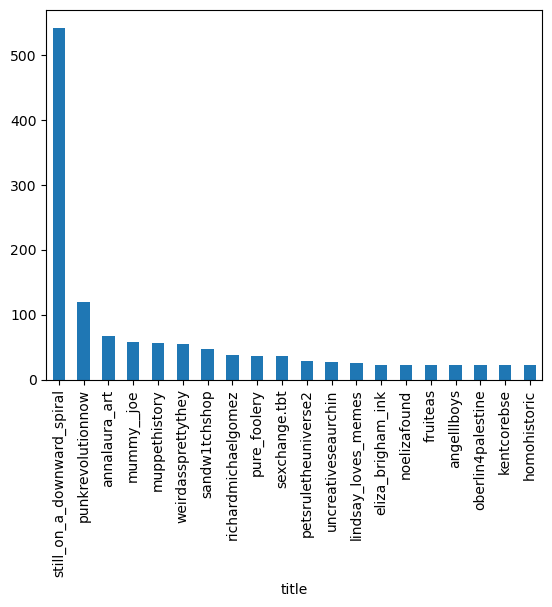

In [16]:
new_likes_df.groupby('title').count().sort_values('timestamp', ascending = False)['timestamp'].head(20).plot(kind = 'bar')

I put it in a graph with a massive X axis to really drive the point home. I kinda wish I didn't know this information lol

I think the section with the most "meat" to work with other than the likes/advertiser data would probably be the messages. One potential question would be, how many messages do I receive vs how many do I send? This would require loading in a huge huge amount of JSON files (like, 20+ depending on the person. for me, it would be around 5 files of active chats, but then choosing only the active ones is excluding some info...)
One interesting thing with a smaller amount of data would be analyzing what the percentage is of messages of text vs posts sent to the chat. Again, depends on the chat chosen (if narrowed down to just one a la chess buddies), but I would hypothesize that for my main chat of friends who live in my dorm it would be about a 70-30 split of text to posts sent.

The hypothesis I choose to test for this assignment is the messages sent vs received, using a chat with my girlfriend (who rarely ever uses instagram). This is not a great hypothesis because I have an idea of what the result will already be, and just want the data to prove it. If I were on a real quest for knowledge I would do something like choose to analyze messages with my old roommate who I communicated with on Instagram and compare the send/seen ratio there, hypothesizing that the person to send more messages was more dissatisfied with the roommate situation (But I would also have a slant on this because I am one of the people being tested... if I weren't the one tested I would require more data than what the Instagram data provided). This is me acknowledging that I know how to form a regular hypothesis. However, I'm easily amused and I think the chart from before is really funny, so I want to see the ratio. My hypothesis is that it's a 80/20 split of things I send vs things she sends.

I'm tired.

In [17]:
path = r"C:\Users\gamec\Desktop\School\Data in Emat\Likes Report\message_1.json"
with open(path) as j:
    gf_chat = js.load(j)

In [18]:
gf_chat.keys()

dict_keys(['participants', 'messages', 'title', 'is_still_participant', 'thread_path', 'magic_words'])

In [19]:
gf_chat_df = pd.DataFrame(gf_chat['messages'])
gf_chat_df.head()

,sender_name,timestamp_ms,content,share,is_geoblocked_for_viewer,reactions,photos
0,ð,1724729161130,You sent an attachment.,{'link': 'https://www.instagram.com/p/C_CA8afo...,False,NaN,NaN
1,ð,1724721493195,You sent an attachment.,{'link': 'https://www.instagram.com/reel/C9BZ8...,False,NaN,NaN
2,ð,1724719755214,You sent an attachment.,{'link': 'https://www.instagram.com/p/C-sQFQOg...,False,NaN,NaN
3,ð,1724716963827,You sent an attachment.,{'link': 'https://www.instagram.com/reel/C82n_...,False,NaN,NaN
4,ð,1724715638232,You sent an attachment.,{'link': 'https://www.instagram.com/p/C-pEPBxM...,False,NaN,NaN


In [20]:
gf_chat_df['sender_name'].iloc[0]

'ð\x9f\x8c\x88'

...Well! This isn't very useful info. I think by grouping by content I can still get my result, "you" sent an attachment gives me something to work off of.

In [21]:
gf_chat_df.groupby('sender_name').count().sort_values('timestamp_ms', ascending = False).head()

,timestamp_ms,content,share,is_geoblocked_for_viewer,reactions,photos
sender_name,,,,,,
ð,1103,1099,855,1103,340,3
ana,458,458,20,458,80,0


Ok that makes a lot of sense (and was a lot easier than I thought), my display name on instagram is an emoji so that's why it isn't correct. We continue!

In [22]:
new_chat_df = gf_chat_df[['sender_name', 'content', 'share', 'reactions']]
new_chat_df.head()

,sender_name,content,share,reactions
0,ð,You sent an attachment.,{'link': 'https://www.instagram.com/p/C_CA8afo...,NaN
1,ð,You sent an attachment.,{'link': 'https://www.instagram.com/reel/C9BZ8...,NaN
2,ð,You sent an attachment.,{'link': 'https://www.instagram.com/p/C-sQFQOg...,NaN
3,ð,You sent an attachment.,{'link': 'https://www.instagram.com/reel/C82n_...,NaN
4,ð,You sent an attachment.,{'link': 'https://www.instagram.com/p/C-pEPBxM...,NaN


The main thing for making the dataframe tidy was getting rid of the geoblocked feature. I removed the photos since there was only three instances. You could definitely make a case to remove the reactions, since there are so many empty cells, but I thought it would be interesting to compare the reactions left by each person as well.

<Axes: xlabel='sender_name'>

C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 136 (\x88)

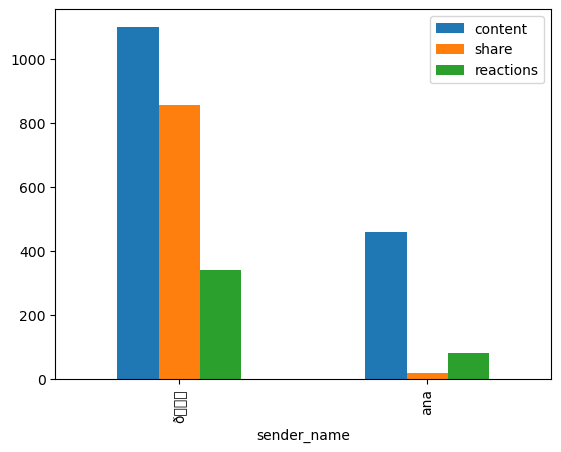

In [23]:
new_chat_df.groupby('sender_name').count().sort_values('reactions', ascending = False).head().plot(kind = 'bar')

<Axes: xlabel='sender_name'>

C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gamec\anaconda3\envs\emat\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 136 (\x88)

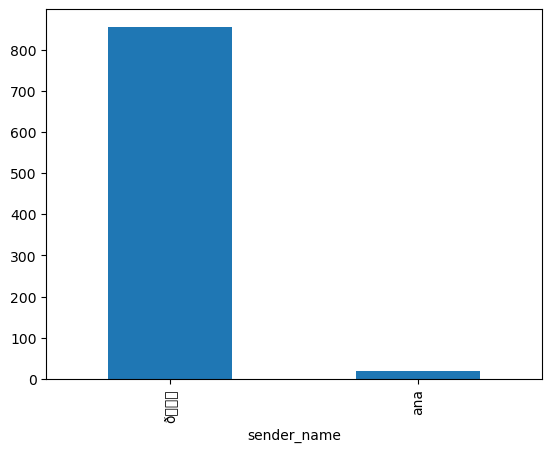

In [24]:
new_chat_df.groupby('sender_name').count().sort_values('share', ascending = False)['share'].head(20).plot(kind = 'bar')

This is interesting! Honestly I thought the overall content was going to be at a much more drastic split. It feels like 90% of our activity is just sending posts back and forth, so I'm curious how the ratio of content to share is so much lower for her vs me. If I knew more about searching the content of the cells I would want to look into the content of her messages vs. mine.

Again, the scope is super limited because it's just two people involved, and to extract much more from this additional tagging would have to be done. My next step would be to start looking into the content of the messages, or to use these tactics on a larger/different chat, like the roommate one mentioned before.